**This assignment is in four parts. Read the notebook from the beginning and answer the questions as you go. You can add as many cells as you want. Submission instructions are at the end. See Canvas for general rules about Assignments and collaboration.**

## Part 1: The 2000 U.S. Presidential Election

The 2000 presidential election---between Republican George W. Bush, Democrat Al Gore, and other third-party candidates---was one of the closest in American history. The election came down to one state, Florida, which Bush won by just 537 votes (out of nearly 6,000,000 votes cast in the state).

After Election Day, Democrats claimed that the ["butterfly ballot"](https://ischool.uw.edu/podcasts/dtctw/palm-beach-county-butterfly-ballot) that was used in Palm Beach County confused Gore voters into voting for Reform Party candidate Pat Buchanan. To vote for Gore, who is listed second on the left, a voter actually had to punch the third hole (because the second hole is actually a vote for Buchanan, who is listed first on the right).

In this exercise, you will evaluate this claim. The data file `https://dlsun.github.io/pods/data/florida.csv` contains county-level information about:

- the number of votes for Gore, Bush, Buchanan, and a few other candidates in the 2000 presidential election
- the number of votes for Clinton (Democrat), Dole (Republican), and Perot (Reform) in the 1996 presidential election
- the number of votes for Buchanan in the 1996 primary
- the number of registered Reform voters and the total number of registered voters

Using this data, evaluate the claim that many voters in Palm Beach County voted for Buchanan when they intended to vote for Gore.
You should check whether Palm Beach County fits the general pattern of the other counties in Florida, but you need to decide how to measure/visualize the "general pattern". Visualizations will likely be more helpful than summary statistics.
Then, craft a story that guides the reader through your discoveries. Your story should contain both figures and explanations.

There are many ways to approach this problem. You don't have to explore every possibility, but you should include at least more than one perspective. That is, you should include several plots/summaries.

Hint: you can add new columns to the data frame. For example, the current columns contain counts, but you might also want to consider proportions. Also, you have the 1996 data for a reason, so you should make some comparisons between 2000 and 1996 (e.g., you might want to compute changes from 1996 to 2000.)

In [2]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT.
import pandas as pd
import numpy as np

df_2000 = pd.read_csv('https://dlsun.github.io/pods/data/florida.csv')

df_2000.head()

,county,buchanan2000,gore2000,bush2000,nader2000,browne2000,total2000,clinton96,dole96,perot96,buchanan96p,reform.reg,total.reg
0,ALACHUA,262,"47,300","34,062","3,215",658,"85,235","40,144","25,303","8,072","2,151",91,"120,867"
1,BAKER,73,"2,392","5,610",53,17,"8,072","2,273","3,684",667,73,4,"12,352"
2,BAY,248,"18,850","38,637",828,171,"58,486","17,020","28,290","5,922","1,816",55,"92,749"
3,BRADFORD,65,"3,072","5,413",84,28,"8,597","3,356","4,038",819,155,3,"13,547"
4,BREVARD,570,"97,318","115,185","4,470",643,"217,616","80,416","87,980","25,249","7,927",148,"283,680"


In [3]:
# remove commas from numbers
df_2000 = df_2000.replace(',','', regex=True)

# convert all columns to numeric except for first column
df_2000.iloc[:,1:] = df_2000.iloc[:,1:].apply(pd.to_numeric)

df_2000.head()

,county,buchanan2000,gore2000,bush2000,nader2000,browne2000,total2000,clinton96,dole96,perot96,buchanan96p,reform.reg,total.reg
0,ALACHUA,262,47300,34062,3215,658,85235,40144,25303,8072,2151,91,120867
1,BAKER,73,2392,5610,53,17,8072,2273,3684,667,73,4,12352
2,BAY,248,18850,38637,828,171,58486,17020,28290,5922,1816,55,92749
3,BRADFORD,65,3072,5413,84,28,8597,3356,4038,819,155,3,13547
4,BREVARD,570,97318,115185,4470,643,217616,80416,87980,25249,7927,148,283680


In [4]:
df_2000['buchanan2000_prop'] = df_2000['buchanan2000'] / df_2000['total2000']
df_2000["gore2000_prop"] = df_2000["gore2000"] / df_2000["total2000"]
df_2000["bush2000_prop"] = df_2000["bush2000"] / df_2000["total2000"]
df_2000["buchanan1996_prop"] = df_2000["buchanan96p"] / df_2000["total.reg"]
df_2000["buchanan change"] = df_2000["buchanan2000_prop"] - df_2000["buchanan1996_prop"]
df_2000["buchanan2000_96_prop"] = (df_2000["buchanan2000"] - df_2000["buchanan96p"]) / (df_2000["buchanan2000"] + df_2000["buchanan96p"])
df_2000["buchanan_vs_gore"] = df_2000["buchanan2000"] / df_2000["gore2000"]

df_2000.head()

,county,buchanan2000,gore2000,bush2000,nader2000,browne2000,total2000,clinton96,dole96,perot96,buchanan96p,reform.reg,total.reg,buchanan2000_prop,gore2000_prop,bush2000_prop,buchanan1996_prop,buchanan change,buchanan2000_96_prop,buchanan_vs_gore
0,ALACHUA,262,47300,34062,3215,658,85235,40144,25303,8072,2151,91,120867,0.003074,0.554936,0.399625,0.017796,-0.014723,-0.782843,0.005539
1,BAKER,73,2392,5610,53,17,8072,2273,3684,667,73,4,12352,0.009044,0.296333,0.694995,0.00591,0.003134,0.0,0.030518
2,BAY,248,18850,38637,828,171,58486,17020,28290,5922,1816,55,92749,0.00424,0.322299,0.66062,0.01958,-0.015339,-0.75969,0.013156
3,BRADFORD,65,3072,5413,84,28,8597,3356,4038,819,155,3,13547,0.007561,0.357334,0.629638,0.011442,-0.003881,-0.409091,0.021159
4,BREVARD,570,97318,115185,4470,643,217616,80416,87980,25249,7927,148,283680,0.002619,0.447201,0.529304,0.027943,-0.025324,-0.865835,0.005857


In [5]:
# see all county names in data in a list
palm_beach = df_2000[df_2000['county'] == 'PALM BEACH']

palm_beach

,county,buchanan2000,gore2000,bush2000,nader2000,browne2000,total2000,clinton96,dole96,perot96,buchanan96p,reform.reg,total.reg,buchanan2000_prop,gore2000_prop,bush2000_prop,buchanan1996_prop,buchanan change,buchanan2000_96_prop,buchanan_vs_gore
49,PALM BEACH,3407,268945,152846,5564,743,428098,230621,133762,30739,8788,337,656694,0.007958,0.628232,0.357035,0.013382,-0.005424,-0.441246,0.012668


In [6]:
import plotly.express as px

In [7]:
fig = px.scatter(df_2000, 
                 x="buchanan96p", 
                 y="buchanan2000", 
                 hover_name="county",
                 labels={
                     "buchanan96p": "Buchanan 1996 Primary Votes",
                     "buchanan2000": "Buchanan 2000 Votes"
                 },
                 title="Buchanan 1996 Primary vs 2000 Votes",
                 # add a trendline
                 trendline="ols")
fig.show()

**Looking at the graph above, we plotted the graph of votes for Buchanan in the 1996 Primary versus votes for Buchanan in the 2000 election. If we see the general trendline and compare the Palm Beach point, Palm Beach is a major outlier. Many more people voted for Buchanan in the 2000 election compared to the 1996 primary.**

In [8]:
fig2 = px.scatter(df_2000,
                  x="total2000",
                  y="buchanan2000",
                  hover_name="county",
                  labels={
                      "total2000": "Total Voters in 2000",
                      "buchanan2000": "Buchanan 2000 Votes"
                  },
                  title="Total Registered Voters vs Buchanan 2000 Votes",)

fig2.show()

**This graph/visualization shows a similar story as the previous graph, however, this graph compares the votes for Buchanan against the total votes in the 2000 election. Looking at this graph, we can see that Palm Beach is an outlier again. The number of people who voted for Buchanan is well above the general trendline for how many votes Buchanan should be getting compared to the total 2000 election votes.**

In [9]:
fig3 = px.scatter(df_2000,
                  x="total2000",
                  y="gore2000",
                  hover_name="county",
                  labels={
                      "total2000": "Total Voters in 2000",
                      "gore2000": "Gore 2000 Votes"
                  },
                  title="Total Voters in 2000 vs Gore 2000 Votes",
                  trendline="ols")

fig3.show()

**Previously, we checked the values regarding the votes for Buchanan, however, this visualization compares the votes that Gore got to check if Gore had less votes in Palm Beach. According to the graph, Gore did not have less votes than the general trend for votes. This is interesting because if Buchanan had significantly more votes than the trend, we would expect Gore to have less as they would balance out, however, that is not the case. So, maybe the votes that Buchanan got are not from Gore and someone else instead. Therefore, we can't fully conclude anything and probably have to get more information.**

## Part 2: Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

**For all of the following parts, your code should be as short and simple as possible. Use `groupby` whenever possible.**

1\. Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization/summary and describe the results in context.

_Hint:_ Use the variable "PR.2", which contains the participants' predictions of how well they would do on a test one week later.

In [10]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT.
url = 'https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv'
df_learning = pd.read_csv(url)

df_learning.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,...,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


In [11]:
df_codebook = pd.read_csv('https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv')
df_codebook

,Name,Variable full label,Variable description,Valid range,Scoring,Value indicating missing data,Value indicating inapplicable data,Experiment file used
0,ID,Participant ID,Participant's study number/identifier,KB1 - KB52,NaN,0,NaN,NaN
1,netID,UVA netID,Student's UVA netID identifier,NaN,NaN,0,NaN,NaN
2,Date.P1,Date part 1,Date of part 1 session,00/00/00,NaN,0,NaN,NaN
3,Date.P2,Date part 2,Date of part 2 session (1 week later),00/00/00,NaN,0,NaN,NaN
4,Condition,Condition assigned,Participant's assigned study condition (block ...,Retrieval OR Concept,NaN,0,NaN,NaN
5,IC.1,Informed consent 1,Informed consent administered for part 1 session,0-1,NaN,0,NaN,"""Karpicke & Blunt (2011) - informed consent (c..."
6,IC.2,Informed consent 2,Informed consent administered for part 2 session,0-1,NaN,0,NaN,"""Karpicke & Blunt (2011) - informed consent (c..."
7,Comp.1,Compensation 1,Compensation (SONA credit) awarded for part 1 ...,0-1,NaN,0,NaN,0.5 SONA credit
8,Comp.2,Compensation 2,Compensation (SONA credit) awarded for part 2 ...,0-1,NaN,0,NaN,0.5 SONA credit
9,PR.1,Prediction response 1,Q1 response,0-1,"(responses: 1 = yes, 0 = no)",0,NaN,"""Karpicke & Blunt (2011) - Prediction question..."


In [12]:
df_codebook = df_codebook[['Name', 'Variable full label', 'Variable description', 'Valid range', 'Scoring']]
df_codebook

,Name,Variable full label,Variable description,Valid range,Scoring
0,ID,Participant ID,Participant's study number/identifier,KB1 - KB52,NaN
1,netID,UVA netID,Student's UVA netID identifier,NaN,NaN
2,Date.P1,Date part 1,Date of part 1 session,00/00/00,NaN
3,Date.P2,Date part 2,Date of part 2 session (1 week later),00/00/00,NaN
4,Condition,Condition assigned,Participant's assigned study condition (block ...,Retrieval OR Concept,NaN
5,IC.1,Informed consent 1,Informed consent administered for part 1 session,0-1,NaN
6,IC.2,Informed consent 2,Informed consent administered for part 2 session,0-1,NaN
7,Comp.1,Compensation 1,Compensation (SONA credit) awarded for part 1 ...,0-1,NaN
8,Comp.2,Compensation 2,Compensation (SONA credit) awarded for part 2 ...,0-1,NaN
9,PR.1,Prediction response 1,Q1 response,0-1,"(responses: 1 = yes, 0 = no)"


In [13]:
p1 = df_learning.groupby('Condition')['PR.2'].mean().reset_index()
p1

,Condition,PR.2
0,Concept,0.690385
1,Retrieval,0.576471


<Axes: title={'center': 'Proportion of Prediction by Condition'}, xlabel='Condition', ylabel='Proportion of Prediction'>

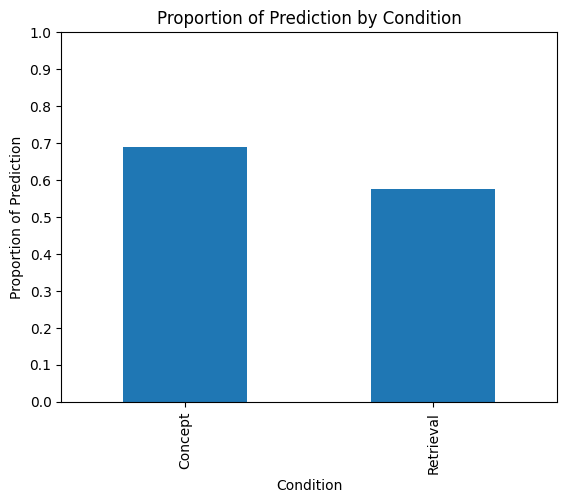

In [14]:
p1.plot.bar(
    title='Proportion of Prediction by Condition',
    x = 'Condition',
    y = 'PR.2',
    legend=False,
    ylabel='Proportion of Prediction',
    ylim=(0, 1),
    yticks=np.arange(0, 1.1, .1)
)

Condition
Concept      Axes(0.125,0.11;0.775x0.77)
Retrieval    Axes(0.125,0.11;0.775x0.77)
Name: PR.2, dtype: object

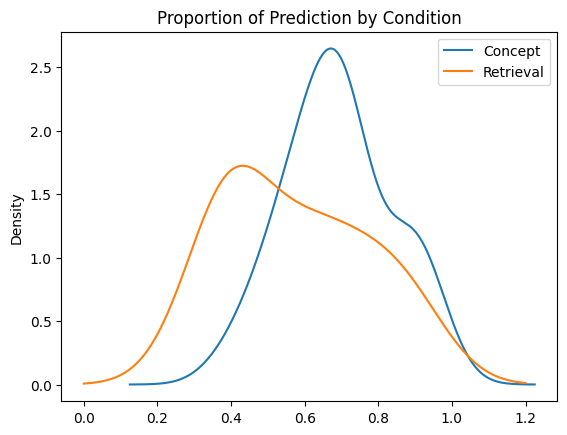

In [18]:
p2 = df_learning.groupby('Condition')['PR.2'].plot.density(
    title='Proportion of Prediction by Condition',
    legend=True,
)
p2

**YOUR RESPONSE HERE**

It seems that more of those who practiced the concept map predicted that they would do well on a test one week later than the group that practiced retrieval.

2\. Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

Read the codebook carefully to figure out which variable to use (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and *explain your choice*.

Hint: check out "TSAvg"

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT.
p2 = df_learning.groupby('Condition')['TS.avg'].mean().reset_index()
p2

,Condition,TS.avg
0,Concept,0.468846
1,Retrieval,0.616471


<Axes: title={'center': 'Proportion of Average Test Score by Condition'}, xlabel='Condition', ylabel='Proportion of Avg Test Scores'>

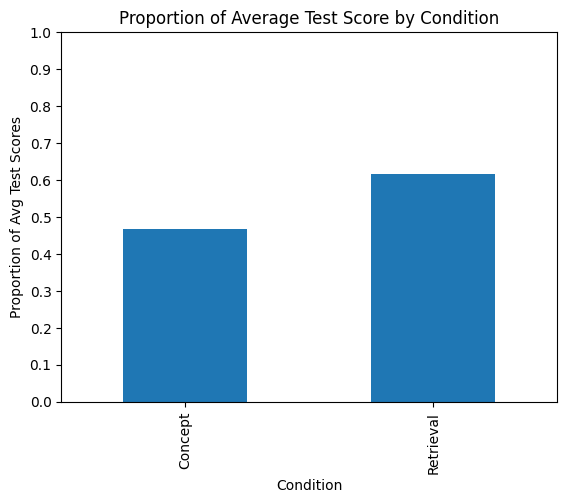

In [ ]:
p2.plot.bar(
    title='Proportion of Average Test Score by Condition',
    ylabel='Proportion of Avg Test Scores',
    x = 'Condition',
    legend=False,
    ylim=(0, 1),
    yticks=np.arange(0, 1.1, .1)
)

Condition
Concept      Axes(0.125,0.11;0.775x0.77)
Retrieval    Axes(0.125,0.11;0.775x0.77)
Name: TS.avg, dtype: object

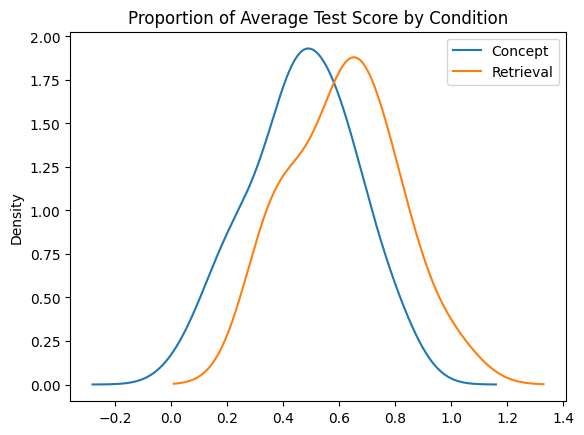

In [21]:
p3 = df_learning.groupby('Condition')['TS.avg'].plot.density(
    title='Proportion of Average Test Score by Condition',
    legend=True,
)
p3

**YOUR RESPONSE HERE**

It seems that the retrieval group did better since the proportion of their average test scores is higher than the concept map group. We stuck with the TS.avg variable since it measures the average of the first and second scorer's test scores.

3\. How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance, make an appropriate visualization/summary, and describe the results in context.

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT.
df_learning['Prediction Error'] = abs(df_learning['TS.avg'] - df_learning['PR.2'])
prediction_accuracy = df_learning.groupby('Condition')['Prediction Error'].mean().reset_index()

prediction_accuracy

,Condition,Prediction Error
0,Concept,0.275385
1,Retrieval,0.191765


In [ ]:
import altair as alt

alt.Chart(prediction_accuracy).mark_bar().encode(
    x='Condition',
    y='Prediction Error'
).properties(
    title='Prediction Accuracy by Condition'
)

alt.Chart(...)

In [28]:
fig2 = px.scatter(df_learning,
                    x="PR.2",
                    y="TS.avg",
                    color="Condition",
                    title="Average Test Score vs Prediction",
                    trendline="ols")
fig2.show()

**YOUR RESPONSE HERE**

From the bar graph, the group with the retrieval practice had a lower prediction error compared to the concept group. Essentially, those who practiced retrieval were better at predicting their performance on the follow-up test than those who utilized concept maps. This is also reinforced by the chart above where the retrieval group more accurately predicted their score on the follow-up test.

4\. Write a paragraph summarizing the conclusions of your analysis. Based on this study alone, what would you tell other students about study strategies?

**YOUR RESPONSE HERE**

Based on this study alone, we would tell other students that retrieval practice is a better study strategy than concept mapping. This is because the retrieval group did better on the follow-up test than the concept group. When it comes to predicting how well they would do on the follow-up test, the retrieval group was still better at predicting their performance than the concept group, so in the end I would tell the other students that retrieval practice is a better study strategy than concept mapping.

## Part 3: Data Visualization

In the in class notebook for Day 06, you played with two activities: "Graph Gallery" and "Copy the Masters". Choose one graph that you created --- using either Altair or Plotly --- for these activities and reproduce it here. Your graph doesn't have to be perfect, but you should definitely do some tailoring beyond what you did in class to make it as clean as possible.

Remember: just because you can produce a graph doesn't necessarily mean it's an effective visual in context. If you choose the "graph gallery" activity, select a graph that most effectively conveys the story in the data. If you choose the "copy the masters" activity, you don't necessarily have to "copy" them; maybe you can find a way to improve the graphic!

Include all the code necessary to produce the graphic. Then write two paragraphs:

- one that describes the story that the graphic tells in context
- one that describes why you chose this graphic and your process for recreating it. What was the hardest part to implement?

1\. Provide your code and reproduce your graphic here

In [ ]:
df_penguins = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/penguins.csv")

px.scatter(df_penguins,
           x="bill_length_mm",
           y="bill_depth_mm",
           color="species",
           marginal_y="box",
           marginal_x="box",
           trendline="ols",
           template="simple_white",
           title="Bill Length vs Bill Depth by Species",
           labels={
                "bill_length_mm": "Bill Length (mm)",
                "bill_depth_mm": "Bill Depth (mm)"
           })

2\. Write a paragraph that describes the story the graphic tells in context.

**This graph displays the bill length versus the bill depth for the penguins. If we do not split up the graph based on the species, then we actually see a negative correlation meaning that penguins with longer bills have smaller bill depths. However, if we put the data in context with the species (as shown in the above graph), we see that for each species there is actually a positive correlation (can see with the trendline as well). Also, each species has its own range for bill lengths or bill depths, most likely due to evolution and them adapting to their surroundings.**

**On the side of the scatter plot, there are also box plots that we can compare for each species regarding specifically bill length or bill depth. We can see that Adelie and Chinstrap have a similar distribution for bill depths, while Gentoo and Chinstrap have similar distribution/spread for bil lengths.**

3\. Write a paragraph that describes why you chose this graphic and your process for recreating it. What was the hardest part to implement?

**A scatter plot is the best way to visualize the bill length vs bill depth for the penguins as each penguin is an observation and we are able to see the general trend visually. We are also able to split the observations by their species, so we can see the trend of all the penguins/observations and specifically for each species as well. A bar graph or line graph would not be able to show the data in the same way where it is easy for the audience to visually see what the general trend is. I saw something similar in the Plotly Graph Gallery that had observations graphed on a scatter plot, colored by a certain variable, and then had a box plot for each axis. I thought that this would be perfect for our penguin data as we want to see how bill depth is related to bill length, but we can also compare each independently. The hardest part was finding out about the marginalx and the marginaly to create the boxplots specific to each axis.**

## Part 4: House Recommendations

In the "Activity" from the Day 07 notebook you recommended some houses that were similar to, but cheaper than, house 0 in the Ames data set. You will recreate your recommendation here. Provide a list of your top recommendations --- including the number of the house and its main features --- and explain why you're recommending these houses. Your explanation should include

- Which variables you included, and why
- Which scaling you used, and why
- Which distance metric you used, and why
- How sensitive your recommendations were to different choices (of variables, scaling, distance metric). You should at least compare to what you did in the previous parts (where you considered the 3 quantitative variables and 1 categorical variable).

Hint: be careful about how you are treating the categorical variables.

1\. Provide all the code to reproduce your recommendations here.

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT.
df_housing = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")
df_housing["Bathrooms"] = df_housing["Full Bath"] + 0.5 * df_housing["Half Bath"]

df_housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Bathrooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,1.0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,1.5
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,2.5
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500,1.0
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000,1.0
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000,1.0
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,Normal,170000,1.0


In [ ]:
df_housing.columns
# Interested in: Bedroom AbvGr, Gr Liv Area, Lot Area, Bldg Type, House Style, Year Built, Garage Area, Bathrooms

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
df_housing_subset = df_housing[["Bedroom AbvGr", "Gr Liv Area", "Lot Area", "Bldg Type", "House Style", "Year Built", "Garage Area", "Bathrooms"]]

df_housing_subset

,Bedroom AbvGr,Gr Liv Area,Lot Area,Bldg Type,House Style,Year Built,Garage Area,Bathrooms
0,3,1656,31770,1Fam,1Story,1960,528.0,1.0
1,2,896,11622,1Fam,1Story,1961,730.0,1.0
2,3,1329,14267,1Fam,1Story,1958,312.0,1.5
3,3,2110,11160,1Fam,1Story,1968,522.0,2.5
4,3,1629,13830,1Fam,2Story,1997,482.0,2.5
...,...,...,...,...,...,...,...,...
2925,3,1003,7937,1Fam,SLvl,1984,588.0,1.0
2926,2,902,8885,1Fam,1Story,1983,484.0,1.0
2927,3,970,10441,1Fam,SFoyer,1992,0.0,1.0
2928,2,1389,10010,1Fam,1Story,1974,418.0,1.0


In [ ]:
# find any missing values
df_housing_subset.isnull().sum()

Bedroom AbvGr    0
Gr Liv Area      0
Lot Area         0
Bldg Type        0
House Style      0
Year Built       0
Garage Area      1
Bathrooms        0
dtype: int64

In [ ]:
df_housing_subset[df_housing_subset["Garage Area"].isnull()]
df_housing_subset.loc[df_housing_subset["Garage Area"].isnull(), "Garage Area"] = 0

df_housing_subset.isnull().sum()

Bedroom AbvGr    0
Gr Liv Area      0
Lot Area         0
Bldg Type        0
House Style      0
Year Built       0
Garage Area      0
Bathrooms        0
dtype: int64

In [ ]:
df_housing_dummies = pd.get_dummies(df_housing_subset, columns=["Bldg Type", "House Style"])
df_housing_dummies

,Bedroom AbvGr,Gr Liv Area,Lot Area,Year Built,Garage Area,Bathrooms,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,3,1656,31770,1960,528.0,1.0,True,False,False,False,False,False,False,True,False,False,False,False,False
1,2,896,11622,1961,730.0,1.0,True,False,False,False,False,False,False,True,False,False,False,False,False
2,3,1329,14267,1958,312.0,1.5,True,False,False,False,False,False,False,True,False,False,False,False,False
3,3,2110,11160,1968,522.0,2.5,True,False,False,False,False,False,False,True,False,False,False,False,False
4,3,1629,13830,1997,482.0,2.5,True,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,3,1003,7937,1984,588.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,True
2926,2,902,8885,1983,484.0,1.0,True,False,False,False,False,False,False,True,False,False,False,False,False
2927,3,970,10441,1992,0.0,1.0,True,False,False,False,False,False,False,False,False,False,False,True,False
2928,2,1389,10010,1974,418.0,1.0,True,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_housing_dummies)
df_housing_scaled = scaler.transform(df_housing_dummies)

df_housing_scaled


array([[ 0.17609421,  0.30926506,  2.74438073, ..., -0.65146333,
        -0.17074395, -0.21373267],
       [-1.03223376, -1.19442705,  0.18709726, ..., -0.65146333,
        -0.17074395, -0.21373267],
       [ 0.17609421, -0.33771825,  0.5228137 , ..., -0.65146333,
        -0.17074395, -0.21373267],
       ...,
       [ 0.17609421, -1.04801492,  0.03719892, ..., -0.65146333,
         5.85672304, -0.21373267],
       [-1.03223376, -0.21900572, -0.01750572, ..., -0.65146333,
        -0.17074395, -0.21373267],
       [ 0.17609421,  0.9898836 , -0.06611797, ...,  1.53500581,
        -0.17074395, -0.21373267]])

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

eu_dist = euclidean_distances(df_housing_scaled, df_housing_scaled[0, :].reshape(1, -1))
eu_dist

array([[0.        ],
       [3.33817768],
       [2.6403318 ],
       ...,
       [7.52623689],
       [3.13733521],
       [4.90935057]])

In [ ]:
df_housing["eu_distances"] = eu_dist
df_recommend = df_housing.sort_values(by = "eu_distances").head(10).sort_values(by = "SalePrice")
df_recommend

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Bathrooms,eu_distances
2298,2299,923251160,20,RL,124.0,27697,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,11,2007,COD,Abnorml,80000,1.0,0.655589
2903,2904,923125030,20,A (agr),125.0,31250,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,5,2006,WD,Normal,81500,1.5,1.465712
1013,1014,527226020,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,...,NaN,Shed,750,5,2008,WD,Normal,115000,1.0,0.477549
970,971,923202060,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,...,GdPrv,NaN,0,11,2009,WD,Normal,115000,1.0,1.570220
2700,2701,904100170,20,RL,100.0,21370,Pave,NaN,Reg,Lvl,...,NaN,Shed,600,6,2006,WD,Normal,131000,1.0,1.496900
334,335,923251080,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,157900,1.0,1.542711
2294,2295,923229140,20,RL,61.0,33983,Pave,NaN,IR1,Lvl,...,GdPrv,NaN,0,5,2007,WD,Normal,196000,1.5,1.203981
1895,1896,534425015,20,RL,NaN,22002,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,7,2007,WD,Normal,200000,1.5,1.466419
2223,2224,909428180,20,RL,NaN,25485,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2007,WD,Normal,201000,1.5,1.155843
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,1.0,0.000000


2\. Provide the list of your top recommendations here, including the number of the house and its main features

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT.
df_recommend[["Bedroom AbvGr", "Gr Liv Area", "Lot Area", "Bldg Type", "House Style", "Year Built", "Garage Area", "Bathrooms", "SalePrice"]].head(5)

,Bedroom AbvGr,Gr Liv Area,Lot Area,Bldg Type,House Style,Year Built,Garage Area,Bathrooms,SalePrice
2298,3,1608,27697,1Fam,1Story,1961,444.0,1.0,80000
2903,3,1600,31250,1Fam,1Story,1951,270.0,1.5,81500
1013,3,1474,31220,1Fam,1Story,1952,495.0,1.0,115000
970,3,1771,21750,1Fam,1Story,1960,336.0,1.0,115000
2700,3,1640,21370,1Fam,1Story,1950,394.0,1.0,131000


In [ ]:
# get house number 0
df_recommend[df_recommend["Order"] == 1][["Bedroom AbvGr", "Gr Liv Area", "Lot Area", "Bldg Type", "House Style", "Year Built", "Garage Area", "Bathrooms", "SalePrice"]]

,Bedroom AbvGr,Gr Liv Area,Lot Area,Bldg Type,House Style,Year Built,Garage Area,Bathrooms,SalePrice
0,3,1656,31770,1Fam,1Story,1960,528.0,1.0,215000


3\. Explain your choices here. Your explanation should include

- Which variables you included, and why
- Which scaling you used, and why
- Which distance metric you used, and why
- How sensitive your recommendations were to different choices (of variables, scaling, distance metric). You should at least compare to what you did in the previous parts (where you considered the 3 quantitative variables and 1 categorical variable).

**YOUR RESPONSE HERE**

- **Which variables you included, and why**
    - Variables I included in my analysis are the bedrooms above ground, living area, lot area, building type, house style, year built, garage area, and bathrooms.
    The reason I chose these variables because they are the most common aspects that people look for when buying a house.
- **Which scaling you used, and why**
    - The scaling I used was the Standard Scaler because it is the most common scaling method used in data science and it is the default scaling method in sklearn. Standardizing the data is important because it allows us to compare the data on the same scale.
- **Which distance metric you used, and why**
    - The distance metric I used was the Euclidean distance because it allows us to measure the distance between two points in space.
- **How sensitive your recommendations were to different choices (of variables, scaling, distance metric). You should at least compare to what you did in the previous parts (where you considered the 3 quantitative variables and 1 categorical variable).**
    - My recommendations were not very sensitive to different choices of distance metrics, since when I used Euclidean and Manhattan the top 5 recommendations were the same. However, from the previous part from day 7 lecture when we considered 3 quant and 1 categorical var, the recommendations differed. The number 1 choice of house 2298 remained the same however then ext 4 recommendations changed due to the effect of the various variables used in this analysis.

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT.
from sklearn.metrics.pairwise import manhattan_distances

man_dist = manhattan_distances(df_housing_scaled, df_housing_scaled[0, :].reshape(1, -1))
man_dist

array([[ 0.        ],
       [ 6.24124991],
       [ 4.71652916],
       ...,
       [15.60433858],
       [ 5.47271521],
       [11.66969279]])

In [ ]:
df_housing["man_distances"] = eu_dist
df_recommend2 = df_housing.sort_values(by = "man_distances").head(10).sort_values(by = "SalePrice")
df_recommend2

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Bathrooms,eu_distances,man_distances
2298,2299,923251160,20,RL,124.0,27697,Pave,NaN,Reg,Lvl,...,NaN,0,11,2007,COD,Abnorml,80000,1.0,0.655589,0.655589
2903,2904,923125030,20,A (agr),125.0,31250,Pave,NaN,Reg,Lvl,...,NaN,0,5,2006,WD,Normal,81500,1.5,1.465712,1.465712
1013,1014,527226020,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,...,Shed,750,5,2008,WD,Normal,115000,1.0,0.477549,0.477549
970,971,923202060,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,...,NaN,0,11,2009,WD,Normal,115000,1.0,1.570220,1.570220
2700,2701,904100170,20,RL,100.0,21370,Pave,NaN,Reg,Lvl,...,Shed,600,6,2006,WD,Normal,131000,1.0,1.496900,1.496900
334,335,923251080,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,...,NaN,0,4,2010,WD,Normal,157900,1.0,1.542711,1.542711
2294,2295,923229140,20,RL,61.0,33983,Pave,NaN,IR1,Lvl,...,NaN,0,5,2007,WD,Normal,196000,1.5,1.203981,1.203981
1895,1896,534425015,20,RL,NaN,22002,Pave,NaN,Reg,Lvl,...,NaN,0,7,2007,WD,Normal,200000,1.5,1.466419,1.466419
2223,2224,909428180,20,RL,NaN,25485,Pave,NaN,IR1,Lvl,...,NaN,0,5,2007,WD,Normal,201000,1.5,1.155843,1.155843
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,0,5,2010,WD,Normal,215000,1.0,0.000000,0.000000


In [ ]:
df_recommend[["Bedroom AbvGr", "Gr Liv Area", "Lot Area", "Bldg Type", "House Style", "Year Built", "Garage Area", "Bathrooms", "SalePrice"]].head(5)

,Bedroom AbvGr,Gr Liv Area,Lot Area,Bldg Type,House Style,Year Built,Garage Area,Bathrooms,SalePrice
2298,3,1608,27697,1Fam,1Story,1961,444.0,1.0,80000
2903,3,1600,31250,1Fam,1Story,1951,270.0,1.5,81500
1013,3,1474,31220,1Fam,1Story,1952,495.0,1.0,115000
970,3,1771,21750,1Fam,1Story,1960,336.0,1.0,115000
2700,3,1640,21370,1Fam,1Story,1950,394.0,1.0,131000


## Submission Instructions

- After you have completed the notebook, select **Runtime > Restart and run all**
- After the notebook finishes rerunning check to make sure that you have no errors and everything runs properly.  Fix any problems and redo this step until it works.
- Rename this notebook by clicking on "DATA 301 Assigment - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of ALL partners who collaborated on this assignment.
- Expand all cells with View > Expand Sections
- Save a PDF version: File > Print > Save as PDF
    - Under "More Settings" make sure "Background graphics" is checked
    - Printing to PDF doesn't always work so well and some of your output might get cutoff. That's ok.
    - It's not necessary, but if you want a more nicely formatted PDF you can uncomment and run the code in the following cell. (Here's a [video](https://www.youtube.com/watch?v=-Ti9Mm21uVc) with other options.)
- Download the notebook: File > Download .ipynb
- **Submit the notebook and PDF in Canvas**. If you worked in a team, only one person should submit in Canvas. Add the names of all team members in the comments in the submission in Canvas.

In [ ]:
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('DATA 301 Lab1B - YOUR NAMES HERE.ipynb')